In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from src.Luminosity.red_cesare import doer_of_thing
from src.Calculators.ray_cesare import ray_maker
from src.Luminosity.special_radii import get_photosphere
import scipy.io
from scipy.stats import gmean
fix = 925
m = 6
Rt = (10**m)**(1/3)

In [2]:
num_array = np.arange(1700, 2000, 50)

In [3]:
lum_array = np.zeros(len(num_array))
photo_mean_aritarray = np.zeros(len(num_array))
photo_mean_geomarray = np.zeros(len(num_array))
for i, num in enumerate(num_array):
    print('num', num)
    lum, sphere_radius = doer_of_thing(fix, m, num)
    sphere_radius = np.array(sphere_radius)
    sphere_radius /=  6.957e10
    lum_array[i] = lum
    photo_mean_aritarray[i] = np.mean(sphere_radius)
    photo_mean_geomarray[i] = gmean(sphere_radius)

num 1700


/Users/paolamartire/miniconda3/envs/tde_comparison/lib/python3.9/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'observers' of function 'THROUPLE_S_CASTERS'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "src/Calculators/legion_of_casters.py", line 12:
@numba.njit
def THROUPLE_S_CASTERS(radii, R,
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


Max:  89
Zero due to: 
- max travel:  13
- T_low: 0
- flux: 0
Flux:  103 
---------
Tot zeros: 13
Negative:  77
Fix 925 , Lum 9.521e+43
num 1750
Max:  91
Zero due to: 
- max travel:  13
- T_low: 0
- flux: 0
Flux:  101 
---------
Tot zeros: 13
Negative:  78
Fix 925 , Lum 9.219e+43
num 1800
Max:  98
Zero due to: 
- max travel:  13
- T_low: 0
- flux: 0
Flux:  94 
---------
Tot zeros: 13
Negative:  85
Fix 925 , Lum 8.049e+43
num 1850
Max:  95
Zero due to: 
- max travel:  13
- T_low: 0
- flux: 0
Flux:  97 
---------
Tot zeros: 13
Negative:  82
Fix 925 , Lum 9.199e+43
num 1900
Max:  98
Zero due to: 
- max travel:  13
- T_low: 0
- flux: 0
Flux:  94 
---------
Tot zeros: 13
Negative:  85
Fix 925 , Lum 8.515e+43
num 1950
Max:  89
Zero due to: 
- max travel:  13
- T_low: 0
- flux: 0
Flux:  103 
---------
Tot zeros: 13
Negative:  77
Fix 925 , Lum 9.395e+43


In [4]:
with open('data/red/convergence_test' + str(fix) + '.txt', 'a') as f:
    f.write('#num \n')
    f.write(' '.join(map(str,num_array)) + '\n')
    f.write('#R_ph arit mean \n')
    f.write(' '.join(map(str, photo_mean_aritarray)) + '\n')
    f.write('#R_ph geom mean \n')
    f.write(' '.join(map(str, photo_mean_geomarray)) + '\n')
    f.write('#Lum \n')
    f.write(' '.join(map(str, lum_array)) + '\n')
    f.close()

In [5]:
data = np.loadtxt('data/red/convergence_test' + str(fix)+ '.txt')
num_array = np.array(data[0])
photo_mean_aritarray = data[1]
photo_mean_geomarray = data[2]
lum_array = data[3]

In [6]:
start = 0.5 * Rt
stop = 10_000 #400 * Rt
log_start = np.log10(start)
log_stop = np.log10(stop)
spacing = np.zeros(len(num_array)) #step in logspace
diff_aritarray = np.zeros(len(num_array)) #cell around R_ph mean
diff_geomarray = np.zeros(len(num_array)) #cell around R_ph mean
for i,num in enumerate(num_array):
    log_radii = np.linspace(log_start, log_stop, int(num)) #simulator units
    spacing[i] = log_radii[1]-log_radii[0]
    
    radii = 10**log_radii
    diff_arit_idx = np.argmin(np.abs(photo_mean_aritarray[i]-radii))
    diff_arit = radii[diff_arit_idx+1]-radii[diff_arit_idx]
    diff_aritarray[i] = diff_arit

    diff_geom_idx = np.argmin(np.abs(photo_mean_geomarray[i]-radii))
    diff_geom = radii[diff_geom_idx+1]-radii[diff_geom_idx]
    diff_geomarray[i] = diff_geom

In [7]:
spacing_plot = np.zeros(len(num_array))
for i,spa in enumerate(spacing):
    spacing_plot[i] = "{:.4f}".format(spa)

In [13]:
choose_reference = np.argmin(np.abs(num_array-1800))
ratio_arit = photo_mean_aritarray / photo_mean_aritarray[choose_reference]
ratio_geom = photo_mean_geomarray / photo_mean_geomarray[choose_reference]
ratio_lum = lum_array / lum_array[choose_reference]

In [14]:
referenced_arit = 1 - ratio_arit
referenced_geom = 1 - ratio_geom
referenced_lum = 1 - ratio_lum

/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_29097/1170514753.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(spacing_plot)


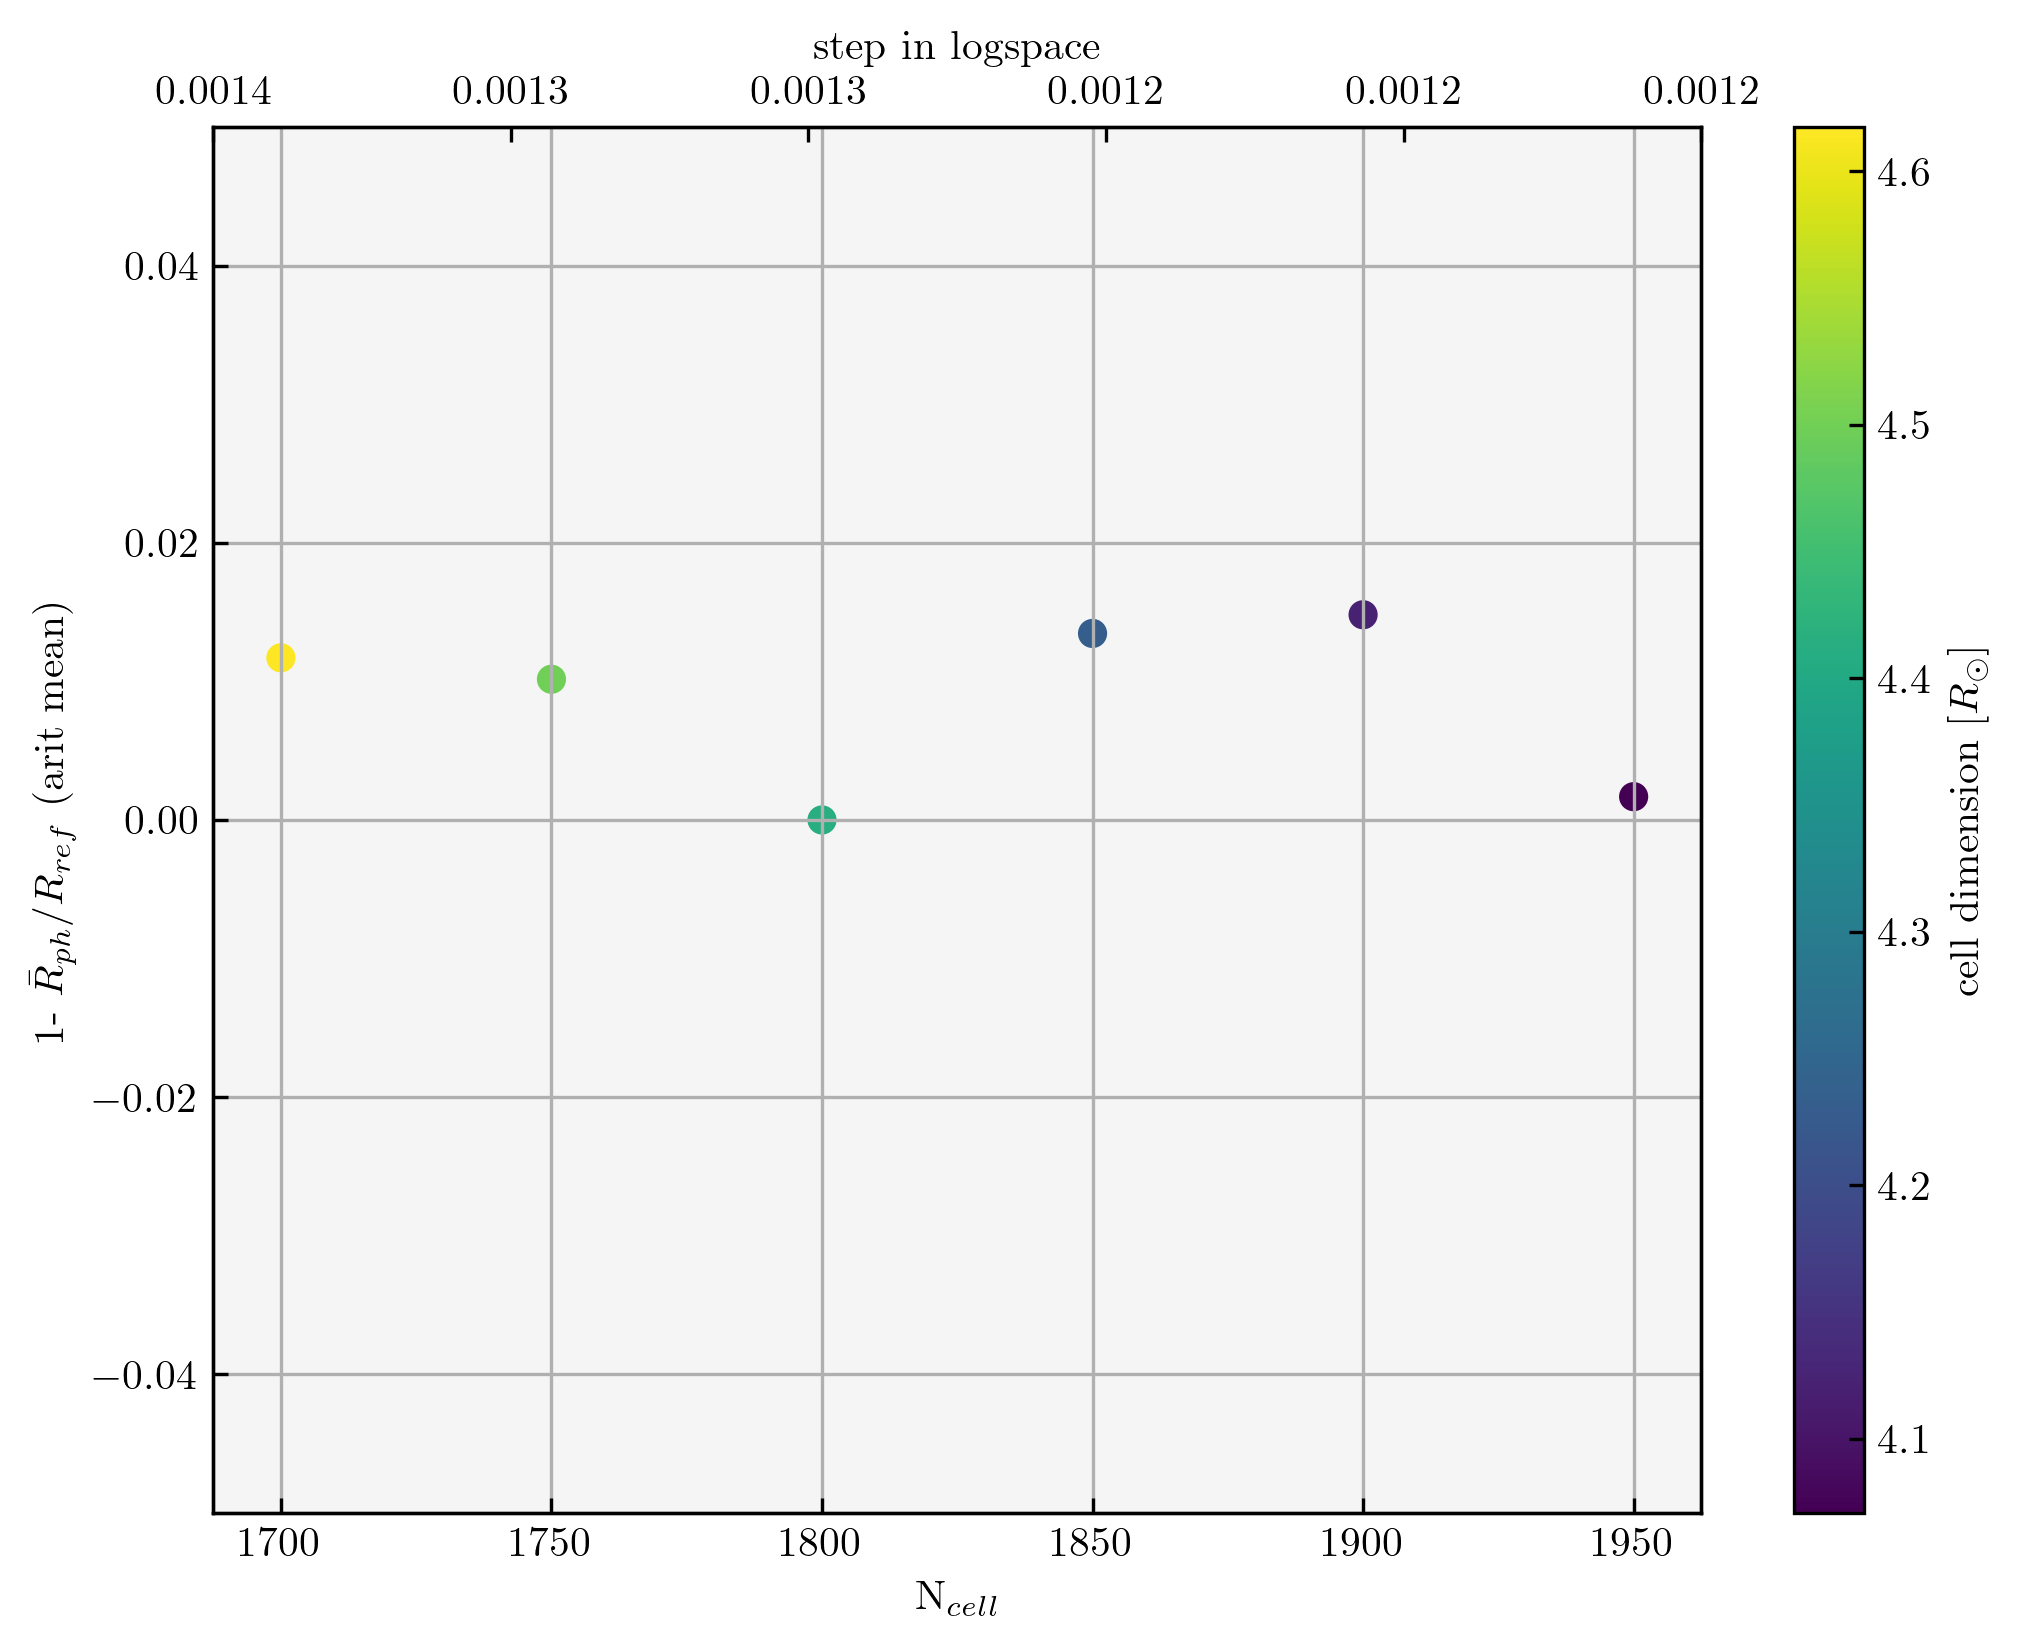

In [15]:
fig, ax1 = plt.subplots( figsize = (8,6) )
ax2 = ax1.twiny()
#img = ax1.scatter(num_array, photo_mean_aritarray, c = diff_aritarray)
img = ax1.scatter(num_array, referenced_arit, c = diff_aritarray)
cbar = fig.colorbar(img)
cbar.set_label(r'cell dimension [$R_\odot$]')
ax1.set_xlabel(r'N$_{cell}$')
ax1.set_ylabel(r'1- $\bar{R}_{ph}/R_{ref}$ (arit mean)')
ax1.grid()
ax1.set_ylim(-0.05, 0.05)
ax2.set_xticklabels(spacing_plot)
ax2.set_xlabel('step in logspace ')
plt.savefig('Figs/Convergence_check/convergence_aritphoto' + str(fix) + '.png')

/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_29097/2312394020.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(spacing_plot)


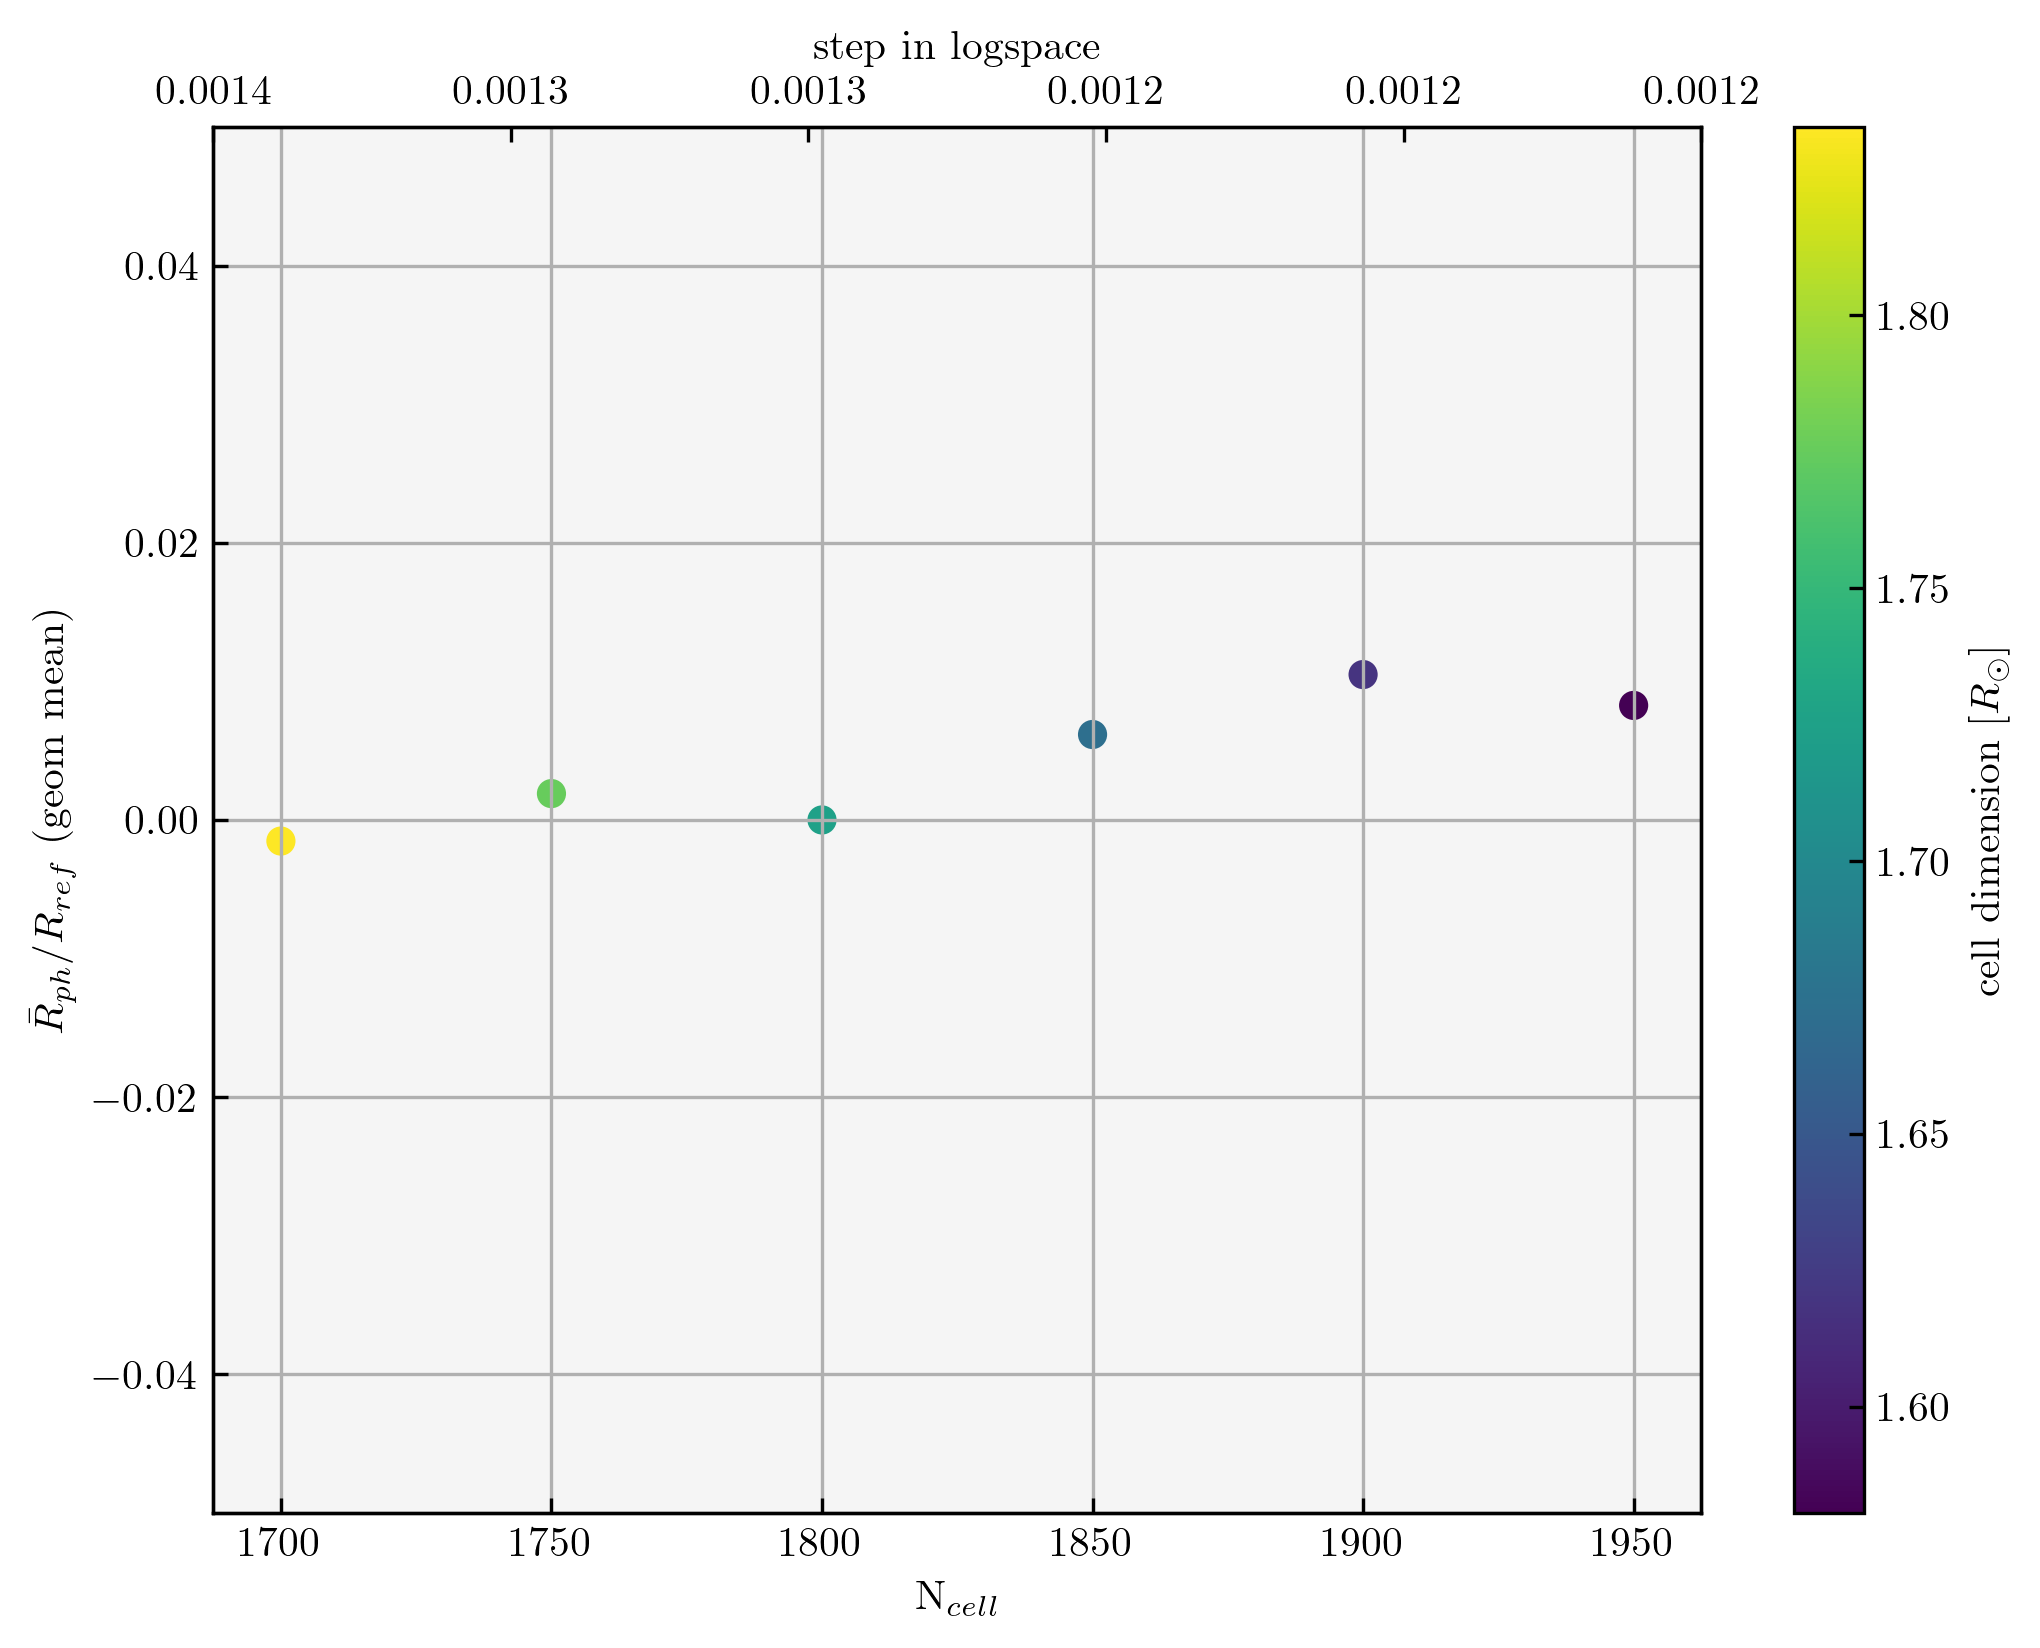

In [16]:
fig, ax1 = plt.subplots( figsize = (8,6) )
ax2 = ax1.twiny()
img = ax1.scatter(num_array, referenced_geom, c = diff_geomarray)
cbar = fig.colorbar(img)
cbar.set_label(r'cell dimension [$R_\odot$]')
ax1.set_xlabel(r'N$_{cell}$')
ax1.set_ylabel(r'$\bar{R}_{ph}/R_{ref}$ (geom mean)')
ax1.grid()
ax1.set_ylim(-0.05, 0.05)
ax2.set_xticklabels(spacing_plot)
ax2.set_xlabel('step in logspace ')
plt.savefig('Figs/Convergence_check/convergence_geomphoto' + str(fix) + '.png')

/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_29097/1162882013.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(spacing_plot)


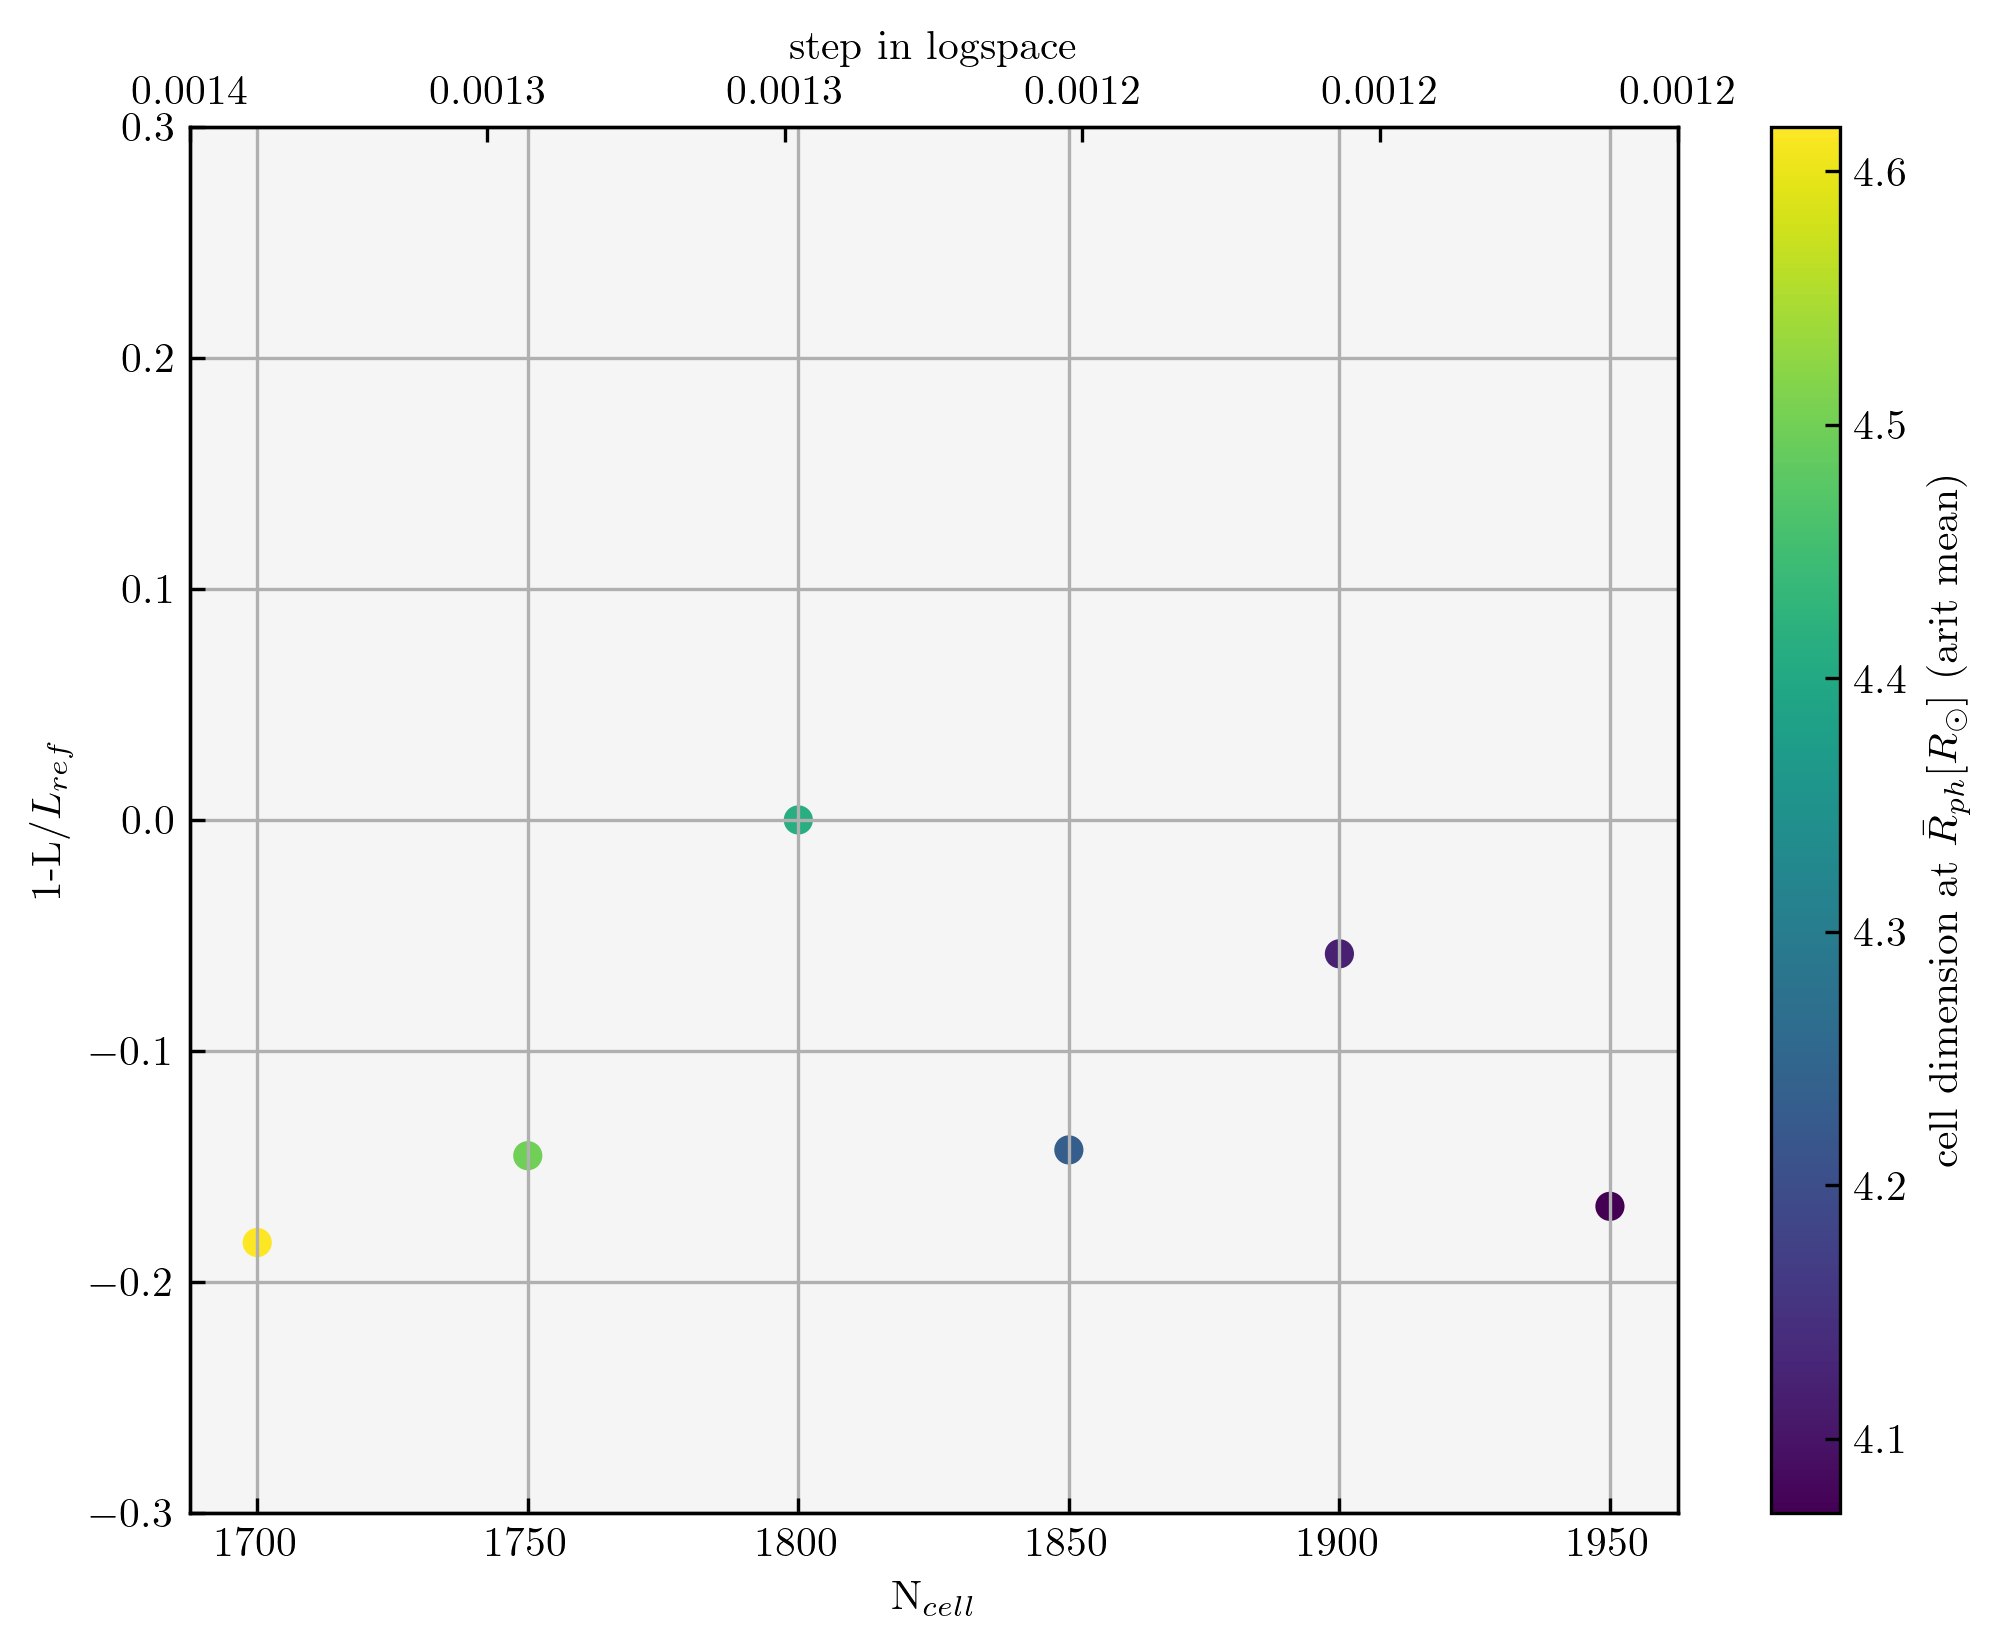

In [17]:
#value_elad = 1.3e44
fig, ax1 = plt.subplots( figsize = (8,6) )
ax2 = ax1.twiny()
img = ax1.scatter(num_array, referenced_lum, c = diff_aritarray)
cbar = fig.colorbar(img)
cbar.set_label(r'cell dimension at $\bar{R}_{ph} [R_\odot$] (arit mean)')
#ax1.axhline(value_elad, c = 'k', linestyle = 'dashed', label = 'Steinberg&Stone')
ax1.set_xlabel(r'N$_{cell}$')
ax1.set_ylabel(r'1-L/$L_{ref}$')
#ax1.set_yscale('log')
ax1.set_ylim(-0.3, 0.3)
ax2.set_xticklabels(spacing_plot)
ax2.set_xlabel('step in logspace')
ax1.grid()
#ax1.legend()
plt.savefig('Figs/Convergence_check/convergence_lum' + str(fix) + '.png')